In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./Prostate_Cancer.csv')

print(data.shape)

data.head()

(100, 10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
'''
from imblearn.over_sampling import SMOTE


# Convert the diagnosis_result column to numerical values if it's categorical

data['diagnosis_result'] = data['diagnosis_result'].astype(

    'category').cat.codes


# Define features and target

X = data.drop(['id', 'diagnosis_result'], axis=1)  # Features

y = data['diagnosis_result']  # Target


# Apply SMOTE to balance the dataset

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)


# Combine the resampled features and target into a single DataFrame

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(

    y_resampled, columns=['diagnosis_result'])], axis=1)


# Display the class distribution before and after resampling

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(x='diagnosis_result', data=data, ax=axes[0])

axes[0].set_title('Original Dataset Class Distribution')

axes[0].set_xlabel('Diagnosis Result')

axes[0].set_ylabel('Count')


sns.countplot(x='diagnosis_result', data=data_resampled, ax=axes[1])

axes[1].set_title('Resampled Dataset Class Distribution')

axes[1].set_xlabel('Diagnosis Result')

axes[1].set_ylabel('Count')


plt.tight_layout()

plt.show()


# now replace the original dataset with the resampled dataset

data = data_resampled

'''
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Load the dataset

# Convert the diagnosis_result column to numerical values if it's categorical
data['diagnosis_result'] = data['diagnosis_result'].astype(
    'category').cat.codes

# Define features and target
X = data.drop(['id', 'diagnosis_result'], axis=1)  # Features
y = data['diagnosis_result']  # Target

# First, apply Random Under Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Next, apply SMOTE to the undersampled dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Combine the resampled features and target into a single DataFrame
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(
    y_resampled, columns=['diagnosis_result'])], axis=1)

# Display the class distribution before and after resampling
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())



Original class distribution:
diagnosis_result
1    62
0    38
Name: count, dtype: int64

Resampled class distribution:
diagnosis_result
0    38
1    38
Name: count, dtype: int64


In [5]:
# data.drop(columns=['id'], axis=1, inplace=True) # drop column 'id' from the dataset to avoid overfitting
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
# Importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=122)
print('Training data: ', train.shape)
print('Test data: ', test.shape)

Training data:  (80, 10)
Test data:  (20, 10)


In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# file_path = '/mnt/data/your_dataset.csv'  # replace with the actual file path
# data = pd.read_csv(file_path)

# # Convert the diagnosis_result column to numerical values if it's categorical
# data['diagnosis_result'] = data['diagnosis_result'].astype(
#     'category').cat.codes

# # Define features and target
# X = data.drop(['id', 'diagnosis_result'], axis=1)  # Features
# y = data['diagnosis_result']  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Apply Recursive Feature Elimination (RFE)
# You can adjust the number of features to select
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the Random Forest model with the selected features
rf.fit(X_train[selected_features], y_train)

# Make predictions
y_pred = rf.predict(X_test[selected_features])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Selected Features: Index(['perimeter', 'area', 'smoothness', 'compactness', 'fractal_dimension'], dtype='object')
Accuracy: 0.7631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.83      0.79      0.81        24

    accuracy                           0.76        38
   macro avg       0.75      0.75      0.75        38
weighted avg       0.77      0.76      0.76        38

Confusion Matrix:
 [[10  4]
 [ 5 19]]


In [8]:
# Splitting the data into train and test
Xtrain = train.drop(columns=['diagnosis_result'], axis=1) 
ytrain = train['diagnosis_result'] 

Xtest = test.drop(columns=['diagnosis_result'], axis=1)
ytest = test['diagnosis_result']
print(Xtest.shape)

(20, 9)


In [7]:
# 1st: Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=122)

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_tree.fit(Xtrain, ytrain) # here we are fitting the model to the training data. Which means we are training the model

print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)  # here grid_search_tree.best_score_ is the best accuracy score

best_tree = grid_search_tree.best_estimator_   # here best_tree is the best decision tree model

test_accuracy_tree = best_tree.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy_tree)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.825
Test Accuracy:  0.75


In [8]:
# 2nd: Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=122)

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_forest.fit(Xtrain, ytrain)

print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

best_forest = grid_search_forest.best_estimator_ # here best_forest is the best random forest model
print(best_forest)
# test accuracy
test_accuracy_forest = best_forest.score(Xtest, ytest) # score method calls the predict method and then compares the predicted values with the actual values
print('Test Accuracy: ', test_accuracy_forest)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.8375
RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=122)
Test Accuracy:  0.9


In [9]:
# 3rd One: Naive Bayes Classification 
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mNB = clf.fit(Xtrain,ytrain)
ypred = mNB.predict(Xtest)
print('Accuracy of Naive Bayes: ', mNB.score(Xtrain, ytrain))
test_accuracy = mNB.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy)

Accuracy of Naive Bayes:  0.7875
Test Accuracy:  0.95


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# create a logistic regression Classifier with increased max_iter
logreg = LogisticRegression(random_state=122, max_iter=10000)

# create an AdaBoost Classifier with Logistic Regression
adaboost_logreg = AdaBoostClassifier(estimator=logreg, random_state=122)

param_grid = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['liblinear', 'saga'],
    'n_estimators': [50, 100, 200]
}

grid_search_adaboost = GridSearchCV(
    adaboost_logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_adaboost.fit(Xtrain_scaled, ytrain)

print('Best Parameters: ', grid_search_adaboost.best_params_)
print('Best Accuracy: ', grid_search_adaboost.best_score_)

# get the best model
best_adaboost_logreg = grid_search_adaboost.best_estimator_

# evaluate the best model on the test set
test_accuracy = best_adaboost_logreg.score(Xtest_scaled, ytest)
print('Test Accuracy: ', test_accuracy)

Best Parameters:  {'estimator__C': 1, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear', 'n_estimators': 50}
Best Accuracy:  0.8375
Test Accuracy:  0.95


In [11]:
# # 5th model: Support Vector Machine
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc_model = SVC(random_state=122)

# # Parameter grid for SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }
# # 
# grid_search_svc = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# grid_search_svc.fit(Xtrain, ytrain)

# # Access and print the results during grid search
# results = grid_search_svc.cv_results_
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print(f'Mean accuracy for {params}: {mean_score:.3f}')

# print('Best Parameters: ', grid_search_svc.best_params_)
# print('Best Accuracy: ', grid_search_svc.best_score_)

# best_svc = grid_search_svc.best_estimator_

# test_accuracy = best_svc.score(Xtest, ytest)
# print('Test Accuracy: ', test_accuracy)


In [12]:
# H1 : Hybrid of DT and RF
from sklearn.ensemble import VotingClassifier

voting_clf_DT_RF = VotingClassifier(estimators=[
    ('decision_tree', best_tree),   
    ('random_forest', best_forest) 
], voting='hard') 

voting_clf_DT_RF.fit(Xtrain, ytrain)

accuracy_DT_RF_test = voting_clf_DT_RF.score(Xtest, ytest)
accuracy_DT_RF_train = voting_clf_DT_RF.score(Xtrain, ytrain)
print('Hybrid of DT and RF Test Accuracy: ', accuracy_DT_RF_test)
print('Hybrid of DT and RF Train Accuracy: ', accuracy_DT_RF_train)


Hybrid of DT and RF Test Accuracy:  0.85
Hybrid of DT and RF Train Accuracy:  0.925


In [14]:
# H2: Hybrid of LR and RF
voting_clf_LR_RF = VotingClassifier(estimators=[
    ('Logistic_reg', best_logreg),
    ('random_forest', best_forest) 
], voting='hard')  

voting_clf_LR_RF.fit(Xtrain, ytrain)

accuracy_LR_RF_test = voting_clf_LR_RF.score(Xtest, ytest)
accuracy_LR_RF_train = voting_clf_LR_RF.score(Xtrain, ytrain)
print('Hybrid of LR and RF Test Accuracy: ', accuracy_LR_RF_test)
print('Hybrid of LR and RF Train Accuracy: ', accuracy_LR_RF_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Hybrid of LR and RF Test Accuracy:  0.95
Hybrid of LR and RF Train Accuracy:  0.875


In [15]:
# H3: Hybrid of LR and DT
voting_clf_LR_DT = VotingClassifier(estimators=[
    ('Logistic_reg', best_logreg),
    ('decision_tree', best_tree)
], voting='hard')  

voting_clf_LR_DT.fit(Xtrain, ytrain)

accuracy_LR_DT_test = voting_clf_LR_DT.score(Xtest, ytest)
accuracy_LR_DT_train = voting_clf_LR_DT.score(Xtrain, ytrain)
print('Hybrid of LR and DT Test Accuracy: ', accuracy_LR_DT_test)
print('Hybrid of LR and DT Train Accuracy: ', accuracy_LR_DT_train)

Hybrid of LR and DT Test Accuracy:  0.85
Hybrid of LR and DT Train Accuracy:  0.85


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
# Hyperparameter Tuning for the Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define the estimators
estimators = [
    ('Logistic_reg', best_logreg),
    ('decision_tree', best_tree)
]

# Create the VotingClassifier
voting_clf_LR_DTH = VotingClassifier(estimators=estimators, voting='hard')

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for the VotingClassifier
param_grid_voting = {
    'weights': [[1,1], [1,2], [2,1], [2,2]]  # Different combinations of weights for LR and DT
}

# Create the GridSearchCV object
grid_search = GridSearchCV(voting_clf_LR_DTH, param_grid=param_grid_voting, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Print the best parameters and best accuracy
print('Best Parameters: ', grid_search.best_params_)
print('Best Accuracy: ', grid_search.best_score_)

# Access the best estimator
best_voting_clf_LR_DT = grid_search.best_estimator_

# Calculate accuracy on test set
accuracy_LR_DT_test = best_voting_clf_LR_DT.score(Xtest, ytest)
print('Hybrid of LR and DT Test Accuracy: ', accuracy_LR_DT_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters:  {'weights': [1, 2]}
Best Accuracy:  0.825
Hybrid of LR and DT Test Accuracy:  0.75


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
# H4: Hybrid of RF and NB
voting_clf_RF_NB = VotingClassifier(estimators=[
    ('random_forest', best_forest),
    ('Naive_Bayes', mNB)
], voting='hard')

voting_clf_RF_NB.fit(Xtrain, ytrain)

accuracy_RF_NB_test = voting_clf_RF_NB.score(Xtest, ytest)
accuracy_RF_NB_train = voting_clf_RF_NB.score(Xtrain, ytrain)

print('Hybrid of RF and NB Test Accuracy: ', accuracy_RF_NB_test)
print('Hybrid of RF and NB Train Accuracy: ', accuracy_RF_NB_train)

Hybrid of RF and NB Test Accuracy:  0.95
Hybrid of RF and NB Train Accuracy:  0.825


In [18]:
# H5: Hybrid of LR and DT and RF
voting_clf_LR_DT_RF = VotingClassifier(estimators=[
    ('Logistic_reg', best_logreg),
    ('decision_tree', best_tree),
    ('random_forest', best_forest)
], voting='hard')

voting_clf_LR_DT_RF.fit(Xtrain, ytrain) 

accuracy_LR_DT_RF_test = voting_clf_LR_DT_RF.score(Xtest, ytest) 
accuracy_LR_DT_RF_train = voting_clf_LR_DT_RF.score(Xtrain, ytrain)

print('Hybrid of LR and DT and RF Test Accuracy: ', accuracy_LR_DT_RF_test)
print('Hybrid of LR and DT and RF Train Accuracy: ', accuracy_LR_DT_RF_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Hybrid of LR and DT and RF Test Accuracy:  0.85
Hybrid of LR and DT and RF Train Accuracy:  0.95


In [19]:
# Hyperparameter Tuning for the Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the estimators
estimators = [
    ('Logistic_reg', best_logreg),
    ('decision_tree', best_tree),
    ('random_forest', best_forest)
]

# Create the VotingClassifier
voting_clf_LR_DT_RFH = VotingClassifier(estimators=estimators, voting='hard')

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for Random Forest
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for the VotingClassifier
param_grid_voting = {
    'weights': [[1,1,1], [1,2,1], [1,1,2], [2,1,1]]  # Different combinations of weights for LR, DT, and RF
}

# Create the GridSearchCV object
grid_search = GridSearchCV(voting_clf_LR_DT_RFH, param_grid=param_grid_voting, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Print the best parameters and best accuracy
print('Best Parameters: ', grid_search.best_params_)
print('Best Accuracy: ', grid_search.best_score_)

# Access the best estimator
best_voting_clf_LR_DT_RF = grid_search.best_estimator_

# Calculate accuracy on test set
accuracy_LR_DT_RF_test = best_voting_clf_LR_DT_RF.score(Xtest, ytest)
print('Hybrid of LR, DT, and RF Test Accuracy: ', accuracy_LR_DT_RF_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters:  {'weights': [1, 1, 1]}
Best Accuracy:  0.8625
Hybrid of LR, DT, and RF Test Accuracy:  0.85


In [20]:
# H : Hybrid of all 4
voting_clf_ALL = VotingClassifier(estimators=[
    ('Logistic_reg', best_logreg),
    ('decision_tree', best_tree),
    ('Naive Bayes', mNB),
    ('Random Forest', best_forest)
], voting='hard')  

voting_clf_ALL.fit(Xtrain, ytrain)

accuracy_ALL_test = voting_clf_ALL.score(Xtest, ytest)
accuracy_ALL_train = voting_clf_ALL.score(Xtrain, ytrain)
print('Hybrid of All ', accuracy_ALL_test)
print('Hybrid of all train ', accuracy_ALL_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Hybrid of All  0.9
Hybrid of all train  0.875


In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier

# Define the estimators
estimators = [
    ('Logistic_reg',  best_forest),
    ('decision_tree', best_forest),
    ('Naive Bayes', best_forest),
    ('Random Forest', best_forest)
]

# Create the VotingClassifier
voting_clf_ALLH = VotingClassifier(estimators=estimators, voting='hard')

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for Random Forest
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for the VotingClassifier
param_grid_voting = {
    'weights': [[1,1,1,1], [1,2,1,1], [1,1,2,1], [1,1,1,2], [2,1,1,1]]  # Different combinations of weights for LR, DT, NB, and RF
}

# Create the GridSearchCV object
grid_search = GridSearchCV(voting_clf_ALLH, param_grid=param_grid_voting, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Print the best parameters and best accuracy
print('Best Parameters: ', grid_search.best_params_)
print('Best Accuracy: ', grid_search.best_score_)

# Access the best estimator
best_voting_clf_ALL = grid_search.best_estimator_

# Calculate accuracy on test set
accuracy_ALL_test = best_voting_clf_ALL.score(Xtest, ytest)
print('Hybrid of All Test Accuracy: ', accuracy_ALL_test)


Best Parameters:  {'weights': [1, 1, 1, 1]}
Best Accuracy:  0.8375
Hybrid of All Test Accuracy:  0.9


In [22]:
# comparision of the models
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [23]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest,ytest,best_tree,'Decision Tree')
forest_summary = performance_evaluation(Xtest,ytest,best_forest,'Random Forest')
multinomialNB_summary = performance_evaluation(Xtest,ytest,mNB,'MultinomialNB')
logistic_summary = performance_evaluation(Xtest_scaled,ytest,best_logreg,'Logistic Regression')
hybrid_sum_DT_RF = performance_evaluation(Xtest,ytest,voting_clf_DT_RF,'DT_RF')
hybrid_sum_LR_RF = performance_evaluation(Xtest,ytest,voting_clf_LR_RF,'LR_RF')
hybrid_sum_LR_DT = performance_evaluation(Xtest,ytest,voting_clf_LR_DT,'LR_DT')
hybrid_sum_RF_NB = performance_evaluation(Xtest,ytest,voting_clf_RF_NB,'RF_NB')
hybrid_sum_LR_DT_RF = performance_evaluation(Xtest,ytest,voting_clf_LR_DT_RF,'LR_DT_RF')
hybrid_sum_ALL = performance_evaluation(Xtest,ytest,voting_clf_ALL,'ALL')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,forest_summary,multinomialNB_summary,logistic_summary,hybrid_sum_DT_RF,hybrid_sum_LR_RF,hybrid_sum_LR_DT,hybrid_sum_RF_NB,hybrid_sum_LR_DT_RF,hybrid_sum_ALL], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree,Random Forest,MultinomialNB,Logistic Regression,DT_RF,LR_RF,LR_DT,RF_NB,LR_DT_RF,ALL
Accuracy,0.750000,0.9,0.950000,0.950000,0.850000,0.950000,0.850000,0.950000,0.850000,0.9
Precision,0.740000,0.9,0.953333,0.953333,0.860440,0.957143,0.860440,0.957143,0.846667,0.9
Recall,0.750000,0.9,0.950000,0.950000,0.850000,0.950000,0.850000,0.950000,0.850000,0.9
F1_Score,0.742947,0.9,0.948589,0.948589,0.852991,0.950997,0.852991,0.950997,0.845768,0.9


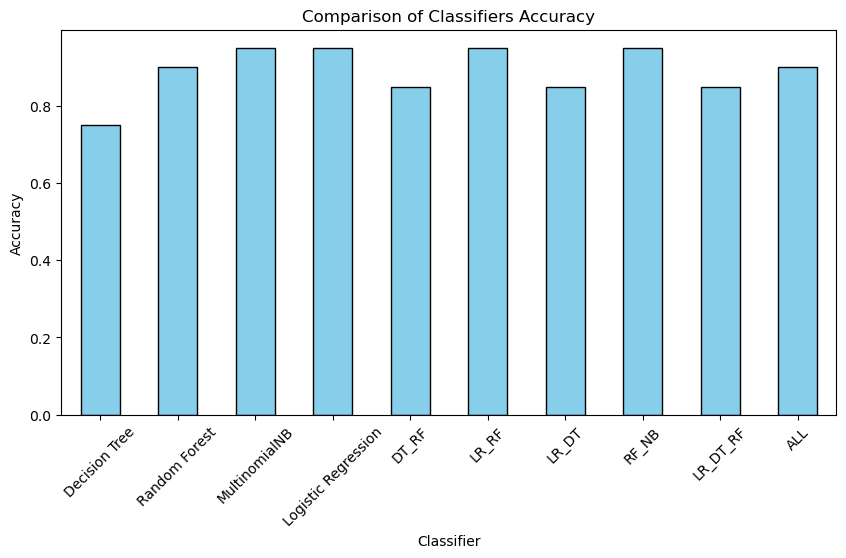

In [24]:
# now  copare the models accuracy using the bar plot
comparison_df.T['Accuracy'].plot(kind='bar', figsize=(10,5), color='skyblue', edgecolor='black')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Comparison of Classifiers Accuracy')
plt.xticks(rotation=45)
plt.show()


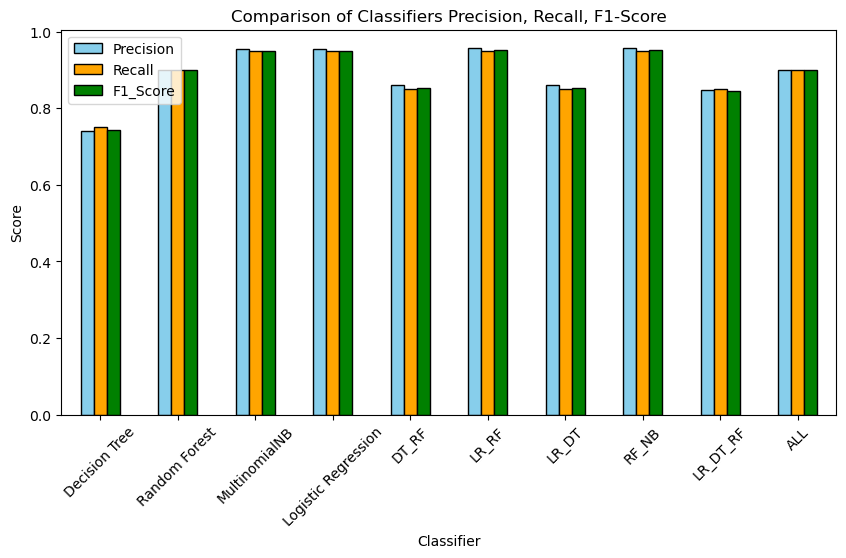

In [39]:
# Precision, Recall, F1-Score comparison of the models
comparison_df.T[['Precision','Recall','F1_Score']].plot(kind='bar', figsize=(10,5), color=['skyblue','orange','green'], edgecolor='black')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.title('Comparison of Classifiers Precision, Recall, F1-Score')
plt.xticks(rotation=45)
plt.show()

# ROC-AUC comparison of the models  


In [27]:
# now download the best model which is the hybrid RF and NB
import joblib
joblib.dump(voting_clf_RF_NB, 'best_model.pkl')


['best_model.pkl']

In [39]:
# now load the model and test it
model = joblib.load('best_model.pkl')

# now lest give the model random data of radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension
data = [[14.0, 14.0, 88.0, 566.0, 0.08, 0.06, 0.04, 0.18, 0.05]]
prediction = model.predict(data)
print(prediction)

[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[ 6  0]
 [ 1 13]]


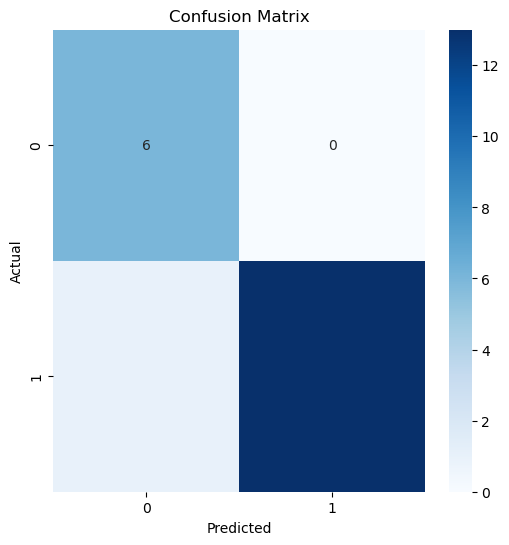

In [38]:
# confustion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix for the best model
# the best model is hybrid_sum_RF_NB = performance_evaluation(Xtest,ytest,voting_clf_RF_NB,'RF_NB')
from sklearn.metrics import confusion_matrix

# Assuming performance_evaluation is not relevant for confusion matrix calculation
conf_matrix = confusion_matrix(ytest, voting_clf_RF_NB.predict(Xtest))

print("Confusion Matrix:")
print(conf_matrix)

# Assuming you have the confusion matrix calculated as 'conf_matrix'
# Replace with your actual confusion matrix


# Confusion matrix from your output
conf_matrix = [[6, 0], [1, 13]]

# Function to plot the confusion matrix


def plot_confusion_matrix(conf_matrix):
  """Plots a confusion matrix as a heatmap."""
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()


# Generate the plot
plot_confusion_matrix(conf_matrix)

# # classification report
# from sklearn.metrics import classification_report

# # classification report for the best model
# print(classification_report(ytest, y_pred))

# # roc curve
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib

# # roc curve for the best model
# y_pred_proba = model.predict_proba(Xtest)[:,1]
# fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
# plt.plot(fpr, tpr, label='ROC Curve', color='blue')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# plt.title('ROC Curve for the Best Model')
# plt.legend()
# plt.show()

# # roc auc score
# # roc auc score for the best model
# roc_auc = roc_auc_score(ytest, y_pred_proba)
# print('ROC AUC Score: ', roc_auc)

In [48]:
# Correlation matrix and heatmap
# convert M and B to 1 and 0 respectively
data['diagnosis_result'] = data['diagnosis_result'].map({'M': 1, 'B': 0})
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

TypeError: list indices must be integers or slices, not str

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Decision Tree model
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(Xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print('Best Parameters (Decision Tree): ', grid_search_tree.best_params_)
print('Best Accuracy (Decision Tree): ', grid_search_tree.best_score_)

# Get the best Decision Tree model
best_tree = grid_search_tree.best_estimator_

# Random Forest model
forest = RandomForestClassifier(random_state=122)

# Define the hyperparameter grid
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV for Random Forest
grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_forest.fit(Xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print('Best Parameters (Random Forest): ', grid_search_forest.best_params_)
print('Best Accuracy (Random Forest): ', grid_search_forest.best_score_)

# Get the best Random Forest model
best_forest = grid_search_forest.best_estimator_

# Combine predictions using a majority voting scheme
hybrid_predictions = []
for i in range(len(Xtest)):
    tree_prediction = best_tree.predict(Xtest)[i]
    forest_prediction = best_forest.predict(Xtest)[i]

    predictions = [tree_prediction, forest_prediction]
    most_common_prediction = max(set(predictions), key=predictions.count)
    hybrid_predictions.append(most_common_prediction)

# Evaluate the accuracy of the hybrid model on the test set
hybrid_accuracy = accuracy_score(ytest, hybrid_predictions)
print("Hybrid Accuracy:", hybrid_accuracy)


Best Parameters (Decision Tree):  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy (Decision Tree):  0.825
Best Parameters (Random Forest):  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy (Random Forest):  0.8375
Hybrid Accuracy: 0.85


In [56]:
# Hybrid of Decision Tree and Naive Bayes
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    # ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    # ('random_forest', best_forest),
    ('decision_tree', best_tree),
    ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_tree_nb = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Decision Tree and Naive Bayes): ', accuracy_tree_nb)

Voting Classifier Accuracy (Decision Tree and Naive Bayes):  0.8


In [57]:
# Hybrid of Logistic Regression and Random Forest
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    ('random_forest', best_forest),
    # ('decision_tree', best_tree),
    # ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_logreg_forest = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Logistic Regression and Random Forest): ', accuracy_logreg_forest)

Voting Classifier Accuracy (Logistic Regression and Random Forest):  0.9


In [58]:
# Hybrid of Logistic Regression and Decision
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    # ('random_forest', best_forest),
    ('decision_tree', best_tree),
    # ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_logreg_forest = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Logistic Regression and Decision Tree): ', accuracy_logreg_forest)

Voting Classifier Accuracy (Logistic Regression and Decision Tree):  0.85


In [59]:
# Hybrid of Logistic Regression and Naive Bayes
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    # ('random_forest', best_forest),
    # ('decision_tree', best_tree),
    ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_logreg_mNB = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Logistic Regression and Naive Bayes): ', accuracy_logreg_mNB)

Voting Classifier Accuracy (Logistic Regression and Naive Bayes):  0.85


In [60]:
# Hybrid of Random Forest and Decision Tree and Logistic Regression
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    ('random_forest', best_forest),
    ('decision_tree', best_tree),
    # ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_logreg_forest_tree = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Logistic Regression, Random Forest and Decision Tree): ', accuracy_logreg_forest_tree)

Voting Classifier Accuracy (Logistic Regression, Random Forest and Decision Tree):  0.9


In [61]:
# Hybrid of logistic regression, random forest, decision tree and naive bayes
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', best_logreg),   # best_tree is the best Decision Tree model
    ('random_forest', best_forest),
    ('decision_tree', best_tree),
    ('naive_bayes', mNB)
], voting='hard')  # 'hard' voting means majority voting

# Fit the Voting Classifier to the data
voting_clf.fit(Xtrain, ytrain)

# Evaluate the accuracy of the Voting Classifier on the test set
accuracy_logreg_forest_tree_mNB = voting_clf.score(Xtest, ytest)
print('Voting Classifier Accuracy (Logistic Regression, Random Forest, Decision Tree and Naive Bayes): ', accuracy_logreg_forest_tree_mNB)

Voting Classifier Accuracy (Logistic Regression, Random Forest, Decision Tree and Naive Bayes):  0.9


In [63]:
# comparision of the models
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res